In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

### 📃 분석 주제 
- 학생들의 최종 시험 점수를 예측합니다.

#### 📌 Feature 별 설명 
> scool : 학생이 재학중인 학교의 이름
> 
> school_setting : 학교의 위치 (Urban : 도시 , Surban : 교외의, Rural : 기타)
> 
> school_type : 학교 유형 (공립, 사립)
> 
> classroom : 교실의 종류
> 
> teaching_method : 교육 방법 (교육방법 : Standard -> 표준 교육 방법 , Experimental -> 실습 위주 교육 방법)
> 
> n_student : 수업에 참여하는 학생 수
> 
> student_id : 학생 고유 ID
> 
> gender : 성별
> 
> lunch : 학생이 무료/ 보조 점심을 받을 자격이 있는 지 여부
> 
> pretest : 사전 테스트 점수
> 
> posttest : 최종 시험 점수 

In [2]:
t_df = pd.read_csv('./datasets/test_scores.csv')
t_df

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


#### 1. 데이터 전처리
> 1. 결측치 , 중복 데이터 제거
> 2. 필요없는 feature 제거
> 3. Target 데이터 (시험점수를 등급으로 나누기)
> 4. 이상치 제거 or 대체
> 5. 일반화 작업 (log1p, StandardScaler() , MinMaxScaler())

In [3]:
t_df = t_df.drop(labels=['n_student', 'student_id', 'classroom'], axis=1)
t_df
# 수업에 참여하는 학생 수는 필요 X 

,school,school_setting,school_type,teaching_method,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,Standard,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,Standard,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,Standard,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,Standard,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,Standard,Male,Qualifies for reduced/free lunch,46.0,53.0


In [4]:
t_df.info()
t_df.isna().sum()
# 결측치 존재 안함 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   teaching_method  2133 non-null   object 
 4   gender           2133 non-null   object 
 5   lunch            2133 non-null   object 
 6   pretest          2133 non-null   float64
 7   posttest         2133 non-null   float64
dtypes: float64(2), object(6)
memory usage: 133.4+ KB


school             0
school_setting     0
school_type        0
teaching_method    0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [5]:
t_df.duplicated().sum() 
# 중복 데이터 -> 148개

148

In [6]:
t_df = t_df.drop_duplicates()
t_df.duplicated().sum()

0

array([[<Axes: title={'center': 'pretest'}>,
        <Axes: title={'center': 'posttest'}>]], dtype=object)

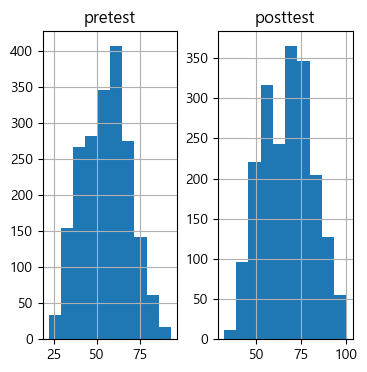

In [7]:
t_df.hist(figsize=(4,4))

#### 각 점수로 매겨져있는 Target 데이터를 등급으로 변환 (상대 평가 기준)

In [8]:
t_df

,school,school_setting,school_type,teaching_method,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,61.0,77.0
5,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,66.0,74.0
...,...,...,...,...,...,...,...,...
2125,ZOWMK,Urban,Public,Standard,Female,Qualifies for reduced/free lunch,45.0,47.0
2126,ZOWMK,Urban,Public,Standard,Male,Qualifies for reduced/free lunch,38.0,51.0
2127,ZOWMK,Urban,Public,Standard,Male,Qualifies for reduced/free lunch,39.0,50.0
2129,ZOWMK,Urban,Public,Standard,Female,Qualifies for reduced/free lunch,38.0,46.0


In [9]:
import numpy as np

l1, l2, l3, l4, l5 = np.percentile(t_df['posttest'], [1, 30, 60, 95, 100])
print(l1, l2, l3, l4, l5)

b1, b2, b3, b4, b5 = np.percentile(t_df['pretest'], [1, 30, 60, 95, 100])
print(b1, b2, b3, b4, b5)

39.84 58.19999999999993 71.0 91.0 100.0
28.84 47.0 59.0 77.0 93.0


In [10]:
def get_level(x) :
    if x < l1:
        return 6
    if x > l1 and x <= l2 :
        return 5
    if x > l2 and x <= l3 :
        return 4
    if x > l3 and x <= l4 :
        return 3
    if x > l4 and x <= l5 :
        return 2
    return 1

In [11]:
def get_level(x) :
    if x < b1:
        return 6
    if x > b1 and x <= b2 :
        return 5
    if x > b2 and x <= b3 :
        return 4
    if x > b3 and x <= b4 :
        return 3
    if x > b4 and x < b5 :
        return 2
    return 1

In [12]:
t_df['posttest'] = t_df['posttest'].apply(get_level)
t_df['pretest'] = t_df['pretest'].apply(get_level)
t_df

C:\Users\user\AppData\Local\Temp\ipykernel_15824\1137955192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['posttest'] = t_df['posttest'].apply(get_level)
C:\Users\user\AppData\Local\Temp\ipykernel_15824\1137955192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['pretest'] = t_df['pretest'].apply(get_level)


,school,school_setting,school_type,teaching_method,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,3,3
1,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,3,2
2,ANKYI,Urban,Non-public,Standard,Male,Does not qualify,3,3
3,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,3,3
5,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,3,3
...,...,...,...,...,...,...,...,...
2125,ZOWMK,Urban,Public,Standard,Female,Qualifies for reduced/free lunch,5,5
2126,ZOWMK,Urban,Public,Standard,Male,Qualifies for reduced/free lunch,5,4
2127,ZOWMK,Urban,Public,Standard,Male,Qualifies for reduced/free lunch,5,4
2129,ZOWMK,Urban,Public,Standard,Female,Qualifies for reduced/free lunch,5,5


In [13]:
t_df['posttest'] = t_df['posttest'].replace([5,4,3,2,1], ['F', 'D', 'C', 'B', 'A'])
t_df['pretest'] = t_df['pretest'].replace([5,4,3,2,1], ['F', 'D', 'C', 'B', 'A'])

t_df

C:\Users\user\AppData\Local\Temp\ipykernel_15824\1927432543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['posttest'] = t_df['posttest'].replace([5,4,3,2,1], ['F', 'D', 'C', 'B', 'A'])
C:\Users\user\AppData\Local\Temp\ipykernel_15824\1927432543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['pretest'] = t_df['pretest'].replace([5,4,3,2,1], ['F', 'D', 'C', 'B', 'A'])


,school,school_setting,school_type,teaching_method,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,C,C
1,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,C,B
2,ANKYI,Urban,Non-public,Standard,Male,Does not qualify,C,C
3,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,C,C
5,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,C,C
...,...,...,...,...,...,...,...,...
2125,ZOWMK,Urban,Public,Standard,Female,Qualifies for reduced/free lunch,F,F
2126,ZOWMK,Urban,Public,Standard,Male,Qualifies for reduced/free lunch,F,D
2127,ZOWMK,Urban,Public,Standard,Male,Qualifies for reduced/free lunch,F,D
2129,ZOWMK,Urban,Public,Standard,Female,Qualifies for reduced/free lunch,F,F


In [14]:
t_df['posttest'].value_counts()

posttest
C    849
D    491
B    418
F    154
A     73
Name: count, dtype: int64

#### 💡 시험 성적 분포 (상대평가)
> 1등급(A) (92 ~ 100) : 73명
> 
> 2등급(B) (72 ~ 91) : 418명
> 
> 3등급(C) (59 ~ 71) : 849명
> 
> 4등급(D) (41 ~ 58) : 491명
> 
> 5등급(F) (40 점 이하) : 154명
> 


In [15]:
pt_df = t_df.copy()
pt_df

,school,school_setting,school_type,teaching_method,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,C,C
1,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,C,B
2,ANKYI,Urban,Non-public,Standard,Male,Does not qualify,C,C
3,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,C,C
5,ANKYI,Urban,Non-public,Standard,Female,Does not qualify,C,C
...,...,...,...,...,...,...,...,...
2125,ZOWMK,Urban,Public,Standard,Female,Qualifies for reduced/free lunch,F,F
2126,ZOWMK,Urban,Public,Standard,Male,Qualifies for reduced/free lunch,F,D
2127,ZOWMK,Urban,Public,Standard,Male,Qualifies for reduced/free lunch,F,D
2129,ZOWMK,Urban,Public,Standard,Female,Qualifies for reduced/free lunch,F,F


In [16]:
pt_df = pt_df.drop(labels=['school'], axis=1)
pt_df

,school_setting,school_type,teaching_method,gender,lunch,pretest,posttest
0,Urban,Non-public,Standard,Female,Does not qualify,C,C
1,Urban,Non-public,Standard,Female,Does not qualify,C,B
2,Urban,Non-public,Standard,Male,Does not qualify,C,C
3,Urban,Non-public,Standard,Female,Does not qualify,C,C
5,Urban,Non-public,Standard,Female,Does not qualify,C,C
...,...,...,...,...,...,...,...
2125,Urban,Public,Standard,Female,Qualifies for reduced/free lunch,F,F
2126,Urban,Public,Standard,Male,Qualifies for reduced/free lunch,F,D
2127,Urban,Public,Standard,Male,Qualifies for reduced/free lunch,F,D
2129,Urban,Public,Standard,Female,Qualifies for reduced/free lunch,F,F


In [17]:
# 연속형 데이터가 없으므로 이상치는 제거할 필요가 없습니다.
# 시각화 (성별 분포, 시험 등급 분포, 사전 테스트 등급 분포, 지역 분포, 학교 종류 분포, 점심 혜택 분포)

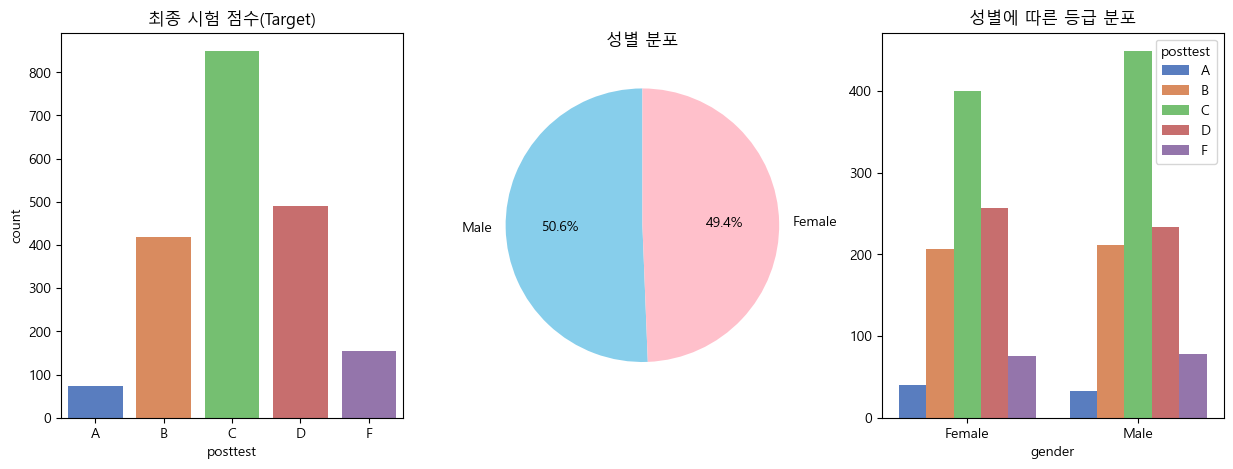

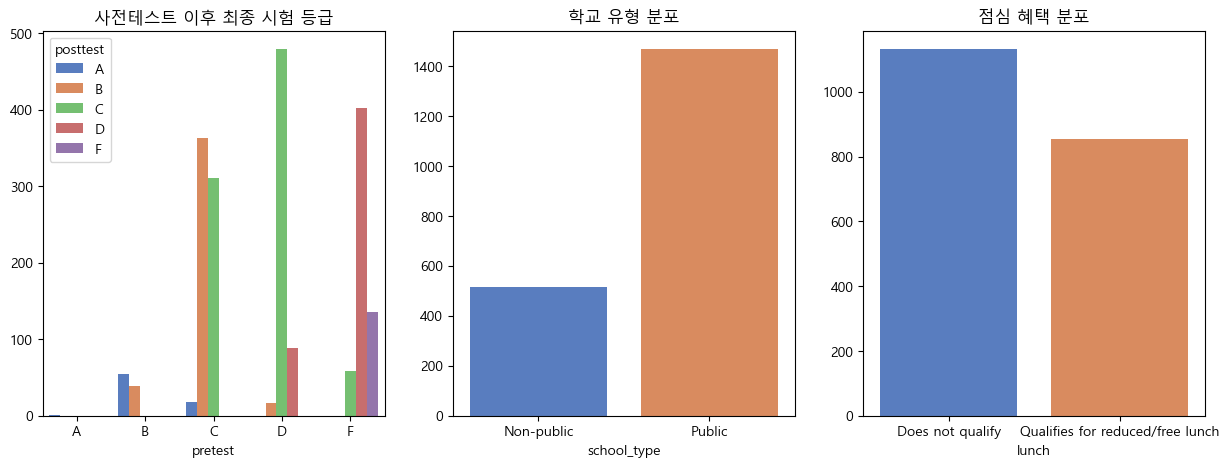

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = {'Male': 'skyblue', 'Female': 'pink'}
order_columns = ['Male', 'Female']
score_columns = ['A', 'B', 'C', 'D', 'F']
gender = pt_df['gender'].value_counts()
lunch = pt_df['lunch'].value_counts()

sns.countplot(ax=axes[0], x='posttest', data=pt_df, palette='muted', order=score_columns)
plt.rcParams['font.family'] = 'Malgun Gothic'
axes[0].set_title('최종 시험 점수(Target)')

gender.plot.pie(ax=axes[1], colors=['skyblue', 'pink'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('성별 분포')
axes[1].set_ylabel('')

sns.countplot(ax=axes[2], x='gender', hue='posttest', data=pt_df, palette='muted', hue_order=score_columns)
axes[2].set_title('성별에 따른 등급 분포')
axes[2].set_ylabel('')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(ax=axes[0], x='pretest', hue='posttest', data=pt_df, palette='muted', hue_order=score_columns, order=score_columns)
plt.rcParams['font.family'] = 'Malgun Gothic'
axes[0].set_title('사전테스트 이후 최종 시험 등급')  # 제목을 설정합니다.
axes[0].set_ylabel('')  # y축 레이블을 제거합니다.

sns.countplot(ax=axes[1], x='school_type', data=pt_df, palette='muted')
plt.rcParams['font.family'] = 'Malgun Gothic'
axes[1].set_title('학교 유형 분포')
axes[1].set_ylabel('')

sns.countplot(ax=axes[2], x='lunch', data=pt_df, palette='muted')
axes[2].set_title('점심 혜택 분포')
axes[2].set_ylabel('')
plt.show()


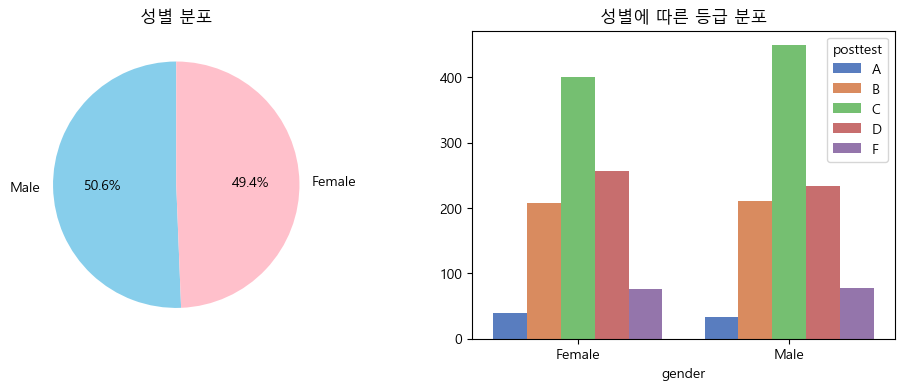

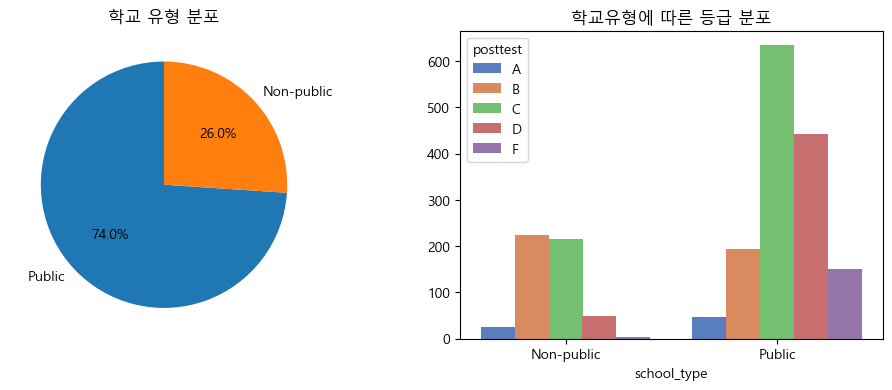

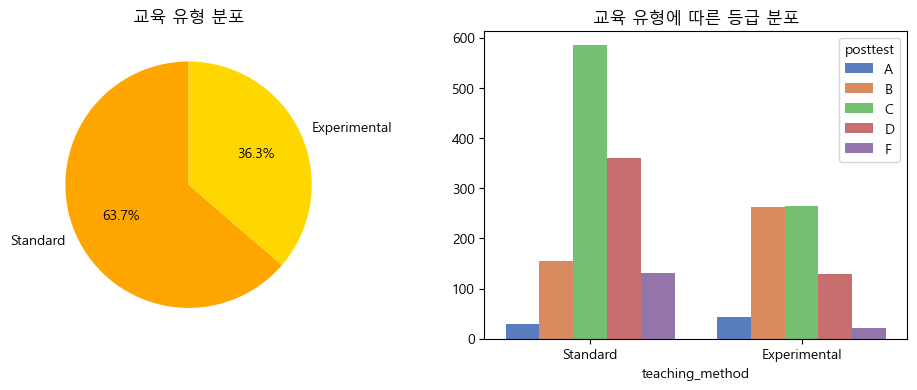

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
colors = {'Male': 'skyblue', 'Female': 'pink'}
order_columns = ['Male', 'Female']
score_columns = ['A', 'B', 'C', 'D', 'F']

# 성별 분포
gender = pt_df['gender'].value_counts()
gender.plot.pie(ax=axes[0], colors=['skyblue', 'pink'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('성별 분포')
axes[0].set_ylabel('')

# 성별에 따른 등급 분포
sns.countplot(ax=axes[1], x='gender', hue='posttest', data=pt_df, palette='muted', hue_order=score_columns)
axes[1].set_title('성별에 따른 등급 분포')
axes[1].set_ylabel('')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# 학교 유형 분포
school_type = pt_df['school_type'].value_counts()
school_type.plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90)
axes[0].set_title('학교 유형 분포')
axes[0].set_ylabel('')


sns.countplot(ax=axes[1] ,x='school_type', hue='posttest', data=pt_df, palette='muted', hue_order=score_columns)
axes[1].set_title('학교유형에 따른 등급 분포')
axes[1].set_ylabel('')
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# 교육 유형 분포 
school_type = pt_df['teaching_method'].value_counts()
school_type.plot.pie(ax=axes[0], colors=['orange', 'gold'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('교육 유형 분포')
axes[0].set_ylabel('')


sns.countplot(ax=axes[1] ,x='teaching_method', hue='posttest', data=pt_df, palette='muted', hue_order=score_columns)
axes[1].set_title('교육 유형에 따른 등급 분포')
axes[1].set_ylabel('')
plt.show()


### 📈 시각화 분석 내용 
- 최종 시험 점수 통계 결과 3등급(59점 ~ 71점)의 학생들이 가장 많은 것을 알 수 있었습니다.
- 사전에 시험을 봤었던 인원들이 대체적으로 최종 시험을 보았을 때는 한단계 높은 등급의 점수를 받았다는 것을 알 수 있었으며,
- 사립 학교 같은 경우 공립 학교 보다 대체적으로 2등급 학생들의 분포가 3등급 학생들의 분포보다 더 많은 것을 볼 수 있었습니다.

In [20]:
pt_df.isna().sum()
pt_df['pretest'].isna().sum()
pt_df = pt_df[~pt_df['pretest'].isna()]
pt_df = pt_df[~pt_df['posttest'].isna()]
# 결측치 제거 
pt_df.isna().sum()

school_setting     0
school_type        0
teaching_method    0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

columns = pt_df.columns

encoders = {}

# LabelEncoder for()
for column in columns :
    encoder = LabelEncoder()
    pt_df[column] = encoder.fit_transform(pt_df[column].tolist())
    encoders[column] = encoder
pt_df

,school_setting,school_type,teaching_method,gender,lunch,pretest,posttest
0,2,0,1,0,0,3,2
1,2,0,1,0,0,3,1
2,2,0,1,1,0,3,2
3,2,0,1,0,0,3,2
5,2,0,1,0,0,3,2
...,...,...,...,...,...,...,...
2125,2,1,1,0,1,5,4
2126,2,1,1,1,1,5,3
2127,2,1,1,1,1,5,3
2129,2,1,1,0,1,5,4


In [22]:
pt_df.reset_index(drop=True, inplace=True)
pt_df

,school_setting,school_type,teaching_method,gender,lunch,pretest,posttest
0,2,0,1,0,0,3,2
1,2,0,1,0,0,3,1
2,2,0,1,1,0,3,2
3,2,0,1,0,0,3,2
4,2,0,1,0,0,3,2
...,...,...,...,...,...,...,...
1980,2,1,1,0,1,5,4
1981,2,1,1,1,1,5,3
1982,2,1,1,1,1,5,3
1983,2,1,1,0,1,5,4


In [23]:
pt_df.isna().sum()

school_setting     0
school_type        0
teaching_method    0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [24]:
pt_df['posttest'].value_counts()

posttest
2    849
3    491
1    418
4    154
0     73
Name: count, dtype: int64

In [25]:
t_df['posttest'].value_counts()

posttest
C    849
D    491
B    418
F    154
A     73
Name: count, dtype: int64

In [26]:
corr = pt_df.corr()
corr[['posttest']].sort_values(by='posttest', ascending=False)[1:]
# 사전 시험 점수 결과가 가장 큰 영향을 미친다.

,posttest
pretest,0.678521
lunch,0.569197
school_type,0.336366
teaching_method,0.286162
school_setting,0.111225
gender,-0.006347


In [27]:
### 타겟 데이터 비중 맞추기 (SMOTE)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = pt_df.iloc[:,:-1], pt_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
y_train_over.value_counts()

posttest
3    679
1    679
2    679
0    679
4    679
Name: count, dtype: int64

### ✨ 1차 분류 작업 (1 Cycle)  

#### 📌 분류 작업 실시 
- DTC
- SVC (linear)
- KNN
- Bagging (RFC)
-----
#### 📌 분류 작업 실시 (BOOST)
- AdaBoost
- Gradient Boost
- XGBoost
- LightBoost

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# DTC 파라미터
dtc_parameters = {'max_depth' : [5,6,7], 'min_samples_split' : [12,13,14]}
dtc = DecisionTreeClassifier()
# 교차 검증 수행
g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)


In [29]:
g_dtc.fit(X_train_over, y_train_over)

dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)
g_dtc
# max_depth : 7, min_samples_split : 13 or 12


,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 12}",0.726068,7
1,"{'max_depth': 5, 'min_samples_split': 13}",0.726068,7
2,"{'max_depth': 5, 'min_samples_split': 14}",0.726068,7
3,"{'max_depth': 6, 'min_samples_split': 12}",0.736672,3
4,"{'max_depth': 6, 'min_samples_split': 13}",0.736672,3
5,"{'max_depth': 6, 'min_samples_split': 14}",0.736672,3
6,"{'max_depth': 7, 'min_samples_split': 12}",0.737261,1
7,"{'max_depth': 7, 'min_samples_split': 13}",0.737261,1
8,"{'max_depth': 7, 'min_samples_split': 14}",0.736672,3


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [12, 13, 14]},
             return_train_score=True)

In [30]:
# SVC 파라미터 선언 (커널을 linear 로 설정 )
svc_parameters = {'svc__C' : [0.01,0.1,1,10,100],
                 'svc__kernel' : ['linear']
                 }

# SVC 클래스 설정 
svc = SVC(kernel='linear', probability=True)

# SVC 파라미터 구축 
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)


In [31]:
g_svc.fit(X_train_over, y_train_over)

svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(svc_result_df)
g_svc
# Cost : 0.1~100 -> 10

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.01, 'svc__kernel': 'linear'}",0.624742,5
1,"{'svc__C': 0.1, 'svc__kernel': 'linear'}",0.680412,1
2,"{'svc__C': 1, 'svc__kernel': 'linear'}",0.680412,1
3,"{'svc__C': 10, 'svc__kernel': 'linear'}",0.680412,1
4,"{'svc__C': 100, 'svc__kernel': 'linear'}",0.680412,1


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc',
                                        SVC(kernel='linear',
                                            probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear']},
             return_train_score=True)

In [32]:
# KNN 파라미터 선언 
knn_parameters = {'knn__n_neighbors' : [3,5,7,9,11,15]}

# KNN 클래스 선언 
knn = KNeighborsClassifier()

# KNN 파라미터 구축 
knn_pipe = Pipeline([('standard_scaler', StandardScaler()),('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [33]:
g_knn.fit(X_train_over, y_train_over)

knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)

# knn_n_neighbors : 11

,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.652135,5
1,{'knn__n_neighbors': 5},0.650663,6
2,{'knn__n_neighbors': 7},0.660972,3
3,{'knn__n_neighbors': 9},0.660383,4
4,{'knn__n_neighbors': 11},0.676289,1
5,{'knn__n_neighbors': 15},0.668041,2


In [34]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier

# AdaBoost 분류 기법 사용 

paramters = {
    'n_estimators' : [50, 100, 150],
    'learning_rate' : [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=paramters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)



GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]})

In [35]:
g_ada.fit(X_train_over, y_train_over)

ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(ada_result_df)
# {'learning_rate': 0.7, 'n_estimators': 50}

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.373196,12
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.385272,10
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.407069,6
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.379676,11
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.448012,4
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.445655,5
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.500442,1
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.463034,3
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.477467,2
9,"{'learning_rate': 1, 'n_estimators': 50}",0.386451,7


In [36]:
# bagging (RandomForest 알고리즘) 분류 기법 사용 
rfc_parameters = {
    'max_depth' : [5,6,7],
    'min_samples_split' : [12,13,14]
}

rfc = RandomForestClassifier(n_estimators=50)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=5, n_jobs=-1)

In [37]:
g_rfc.fit(X_train_over, y_train_over)

rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)
# {'max_depth': 7, 'min_samples_split': 14}

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 12}",0.731370,7
1,"{'max_depth': 5, 'min_samples_split': 13}",0.734315,3
2,"{'max_depth': 5, 'min_samples_split': 14}",0.731664,6
3,"{'max_depth': 6, 'min_samples_split': 12}",0.731075,8
4,"{'max_depth': 6, 'min_samples_split': 13}",0.731959,5
5,"{'max_depth': 6, 'min_samples_split': 14}",0.730781,9
6,"{'max_depth': 7, 'min_samples_split': 12}",0.735788,2
7,"{'max_depth': 7, 'min_samples_split': 13}",0.736966,1
8,"{'max_depth': 7, 'min_samples_split': 14}",0.734315,3


In [38]:
# Gradient Boost 분류 기법 사용 
gbc_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=gbc_parameters, cv=3)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]})

In [39]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbc_result_df)
# {'learning_rate': 0.3, 'n_estimators': 50}	

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.738731,1
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.736964,8
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.737848,4
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.738436,2
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.737553,7
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.737848,4
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.738436,3
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.737848,4
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.736081,9
9,"{'learning_rate': 1, 'n_estimators': 50}",0.411532,10


In [40]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

x_parameters = {'n_estimators' : [50, 100, 500],
               'learning_rate' : [0.3, 0.5, 0.7, 1]}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, param_grid=x_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [41]:
g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)

xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(xgb_result_df)

# {'learning_rate': 0.7, 'n_estimators': 50}

[0]	validation_0-mlogloss:0.94270	validation_1-mlogloss:1.00467
[1]	validation_0-mlogloss:0.77615	validation_1-mlogloss:0.84694
[2]	validation_0-mlogloss:0.69987	validation_1-mlogloss:0.77224
[3]	validation_0-mlogloss:0.65724	validation_1-mlogloss:0.73113
[4]	validation_0-mlogloss:0.63173	validation_1-mlogloss:0.69811
[5]	validation_0-mlogloss:0.61560	validation_1-mlogloss:0.67724
[6]	validation_0-mlogloss:0.60439	validation_1-mlogloss:0.66413
[7]	validation_0-mlogloss:0.59760	validation_1-mlogloss:0.65080
[8]	validation_0-mlogloss:0.59188	validation_1-mlogloss:0.64508
[9]	validation_0-mlogloss:0.58840	validation_1-mlogloss:0.63590
[10]	validation_0-mlogloss:0.58616	validation_1-mlogloss:0.63092
[11]	validation_0-mlogloss:0.58434	validation_1-mlogloss:0.62681
[12]	validation_0-mlogloss:0.58314	validation_1-mlogloss:0.62279
[13]	validation_0-mlogloss:0.58224	validation_1-mlogloss:0.61817
[14]	validation_0-mlogloss:0.58156	validation_1-mlogloss:0.61633
[15]	validation_0-mlogloss:0.58068	

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-mlogloss:0.57835	validation_1-mlogloss:0.60939
[27]	validation_0-mlogloss:0.57826	validation_1-mlogloss:0.60983
[28]	validation_0-mlogloss:0.57820	validation_1-mlogloss:0.60924
[29]	validation_0-mlogloss:0.57800	validation_1-mlogloss:0.60931
[30]	validation_0-mlogloss:0.57790	validation_1-mlogloss:0.60912
[31]	validation_0-mlogloss:0.57784	validation_1-mlogloss:0.60901
[32]	validation_0-mlogloss:0.57777	validation_1-mlogloss:0.60900
[33]	validation_0-mlogloss:0.57767	validation_1-mlogloss:0.60869
[34]	validation_0-mlogloss:0.57778	validation_1-mlogloss:0.60812
[35]	validation_0-mlogloss:0.57762	validation_1-mlogloss:0.60815
[36]	validation_0-mlogloss:0.57755	validation_1-mlogloss:0.60793
[37]	validation_0-mlogloss:0.57726	validation_1-mlogloss:0.60811
[38]	validation_0-mlogloss:0.57744	validation_1-mlogloss:0.60801
[39]	validation_0-mlogloss:0.57720	validation_1-mlogloss:0.60789
[40]	validation_0-mlogloss:0.57727	validation_1-mlogloss:0.60773
[41]	validation_0-mloglos

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.741679,3
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.741679,3
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.741384,9
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.741384,9
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.741384,9
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.741679,3
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.741973,1
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.741384,9
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.741679,3
9,"{'learning_rate': 1, 'n_estimators': 50}",0.741973,1


In [42]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

lg_parameters = {'n_estimators' : [50, 100, 500],
                'learning_rate' : [0.3, 0.5, 0.7, 1]}
X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train),(X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=lg_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

In [43]:
g_lgbm.fit(X_train_over, y_train_over)

lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(lgbm_result_df)

# {'learning_rate': 0.7, 'n_estimators': 100}

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 3395, number of used features: 6
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.737553,7
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.738437,4
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.738731,2
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.737259,8
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.736670,9
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.738731,2
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.738437,4
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.739909,1
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.738436,6
9,"{'learning_rate': 1, 'n_estimators': 50}",0.291020,10


#### 📌 GraphViz로 결정트리 확인 

In [44]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(g_dtc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([5, 2, 4, 0, 1, 3], dtype=int64)

In [45]:
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

pretest: 0.2646
teaching_method: 0.0982
lunch: 0.0678
school_setting: 0.023
school_type: 0.0118
gender: 0.0111


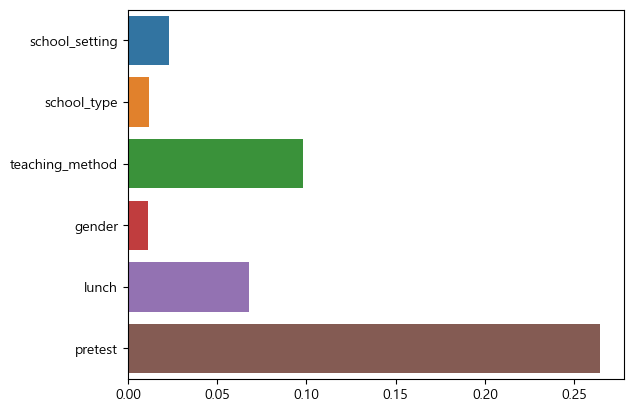

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=importance.importances_mean, y=features.columns)
plt.show()

In [47]:
imp_df = pt_df[['pretest', 'teaching_method', 'posttest']]
imp_df.reset_index()

,index,pretest,teaching_method,posttest
0,0,3,1,2
1,1,3,1,1
2,2,3,1,2
3,3,3,1,2
4,4,3,1,2
...,...,...,...,...
1980,1980,5,1,4
1981,1981,5,1,3
1982,1982,5,1,3
1983,1983,5,1,4


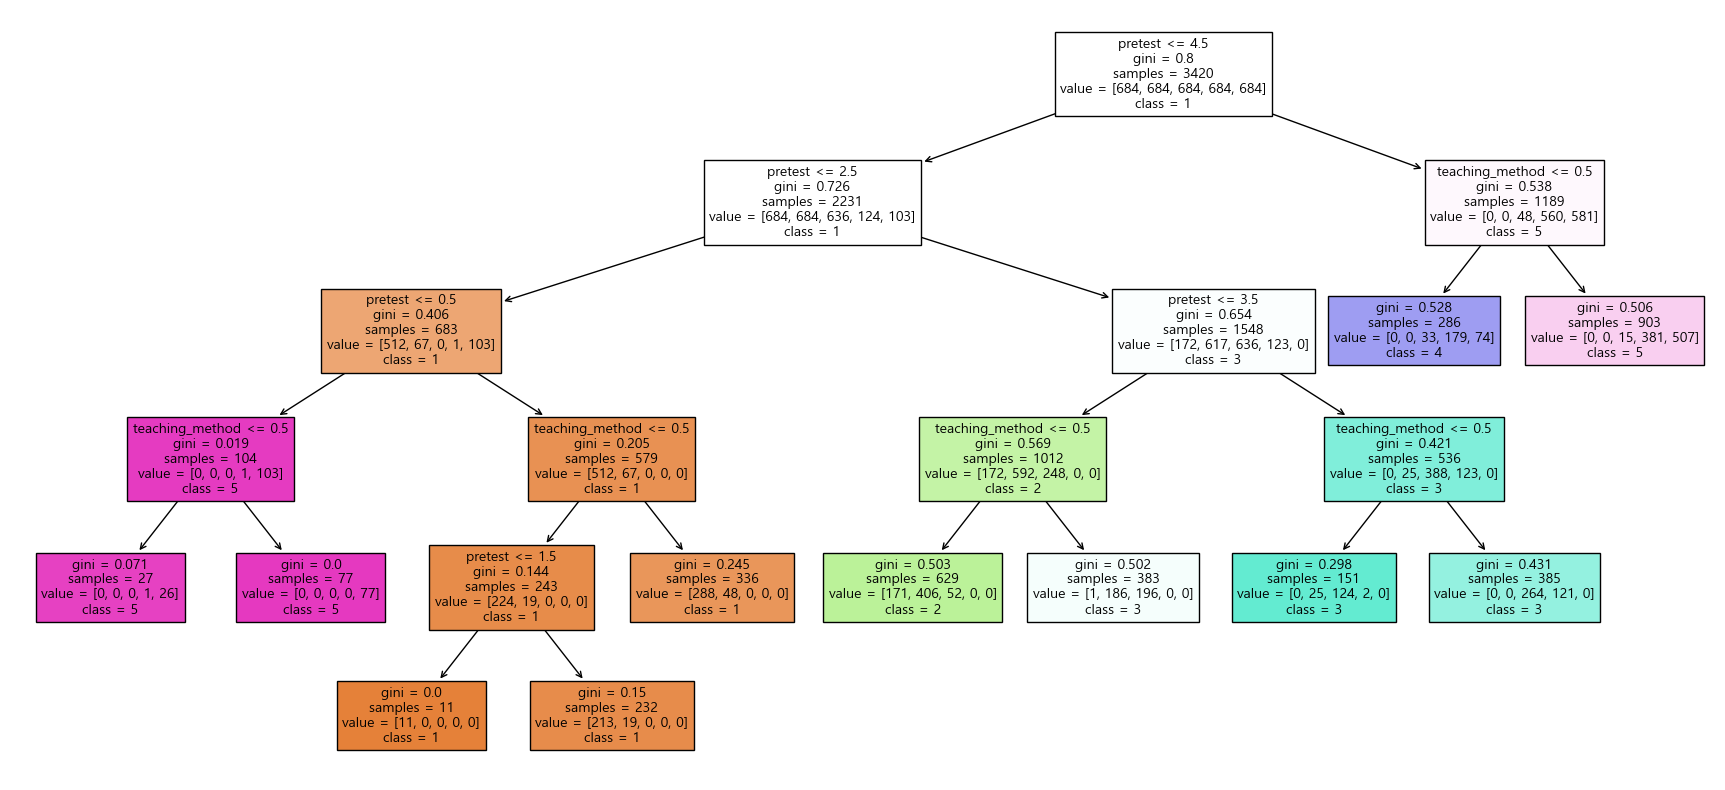

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 결정 트리 모델 초기화
dtc = DecisionTreeClassifier(max_depth=7, min_samples_split=13, random_state=124)

# 특성과 타겟 데이터 준비
features1, targets1 = imp_df.iloc[:,:-1] , imp_df.iloc[:,-1]
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, targets1, test_size=0.2, random_state=124)

# SMOTE를 사용하여 훈련 데이터 오버샘플링
smote = SMOTE(random_state=124)
X_train_over1, y_train_over1 = smote.fit_resample(X_train1, y_train1)

# 모델 훈련
dtc.fit(X_train_over1, y_train_over1)

# 결정 트리 시각화
plt.figure(figsize=(22,10))  # 그림 크기를 조정합니다.
plot_tree(dtc, feature_names=features1.columns, class_names=['1','2','3','4','5'], filled=True, fontsize=10)
plt.show()


In [49]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

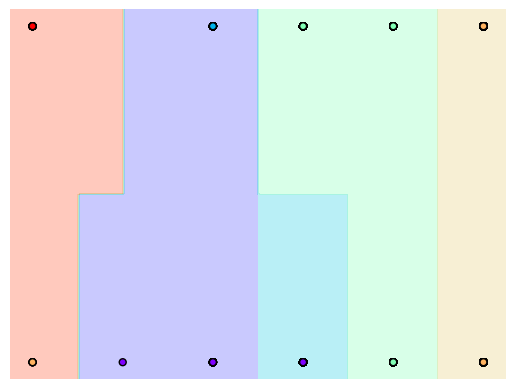

In [50]:
features_2_4 = features1.iloc[:,[0,1]]
visualize_boundary(dtc, features_2_4, targets)

#### 하이퍼 파라미터 조정 후 Decision Boundary (결정경계) 시각화 결과 정상적으로 잘 보여지는 것을 확인 할 수 있습니다.

### 📃 정확도, F1 Score 점수 출력 

In [51]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [52]:
from sklearn.metrics import accuracy_score,precision_score, f1_score
dtc = g_dtc.best_estimator_
dtc_prediction = dtc.predict(X_test)
dtc_score = accuracy_score(y_test, dtc_prediction)
dtc_recall = precision_score(y_test, dtc_prediction, average='macro')
dtc_f1 = f1_score(y_test, dtc_prediction, average='macro')

print('DTC')
print(f'정확도 : {dtc_score}')
print(f'재현율 : {dtc_recall}')
print(f'F1 Score : {dtc_f1}')


DTC
정확도 : 0.6624685138539043
재현율 : 0.6017383233499769
F1 Score : 0.6164294236117999


In [53]:
knn = g_knn.best_estimator_
knn_prediction = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_prediction)
knn_recall = precision_score(y_test, knn_prediction, average='macro')
knn_f1 = f1_score(y_test, knn_prediction, average='macro')

print('KNN')
print(f'정확도 : {knn_score}')
print(f'재현율 : {knn_recall}')
print(f'F1 Score : {knn_f1}')


KNN
정확도 : 0.6649874055415617
재현율 : 0.6004717705352782
F1 Score : 0.6090143906041041


In [54]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)
rfc_score = accuracy_score(y_test, rfc_prediction)
rfc_recall = precision_score(y_test, rfc_prediction, average='macro')
rfc_f1 = f1_score(y_test, rfc_prediction, average='macro')

print('bagging(RFC)')
print(f'정확도 : {rfc_score}')
print(f'재현율 : {rfc_recall}')
print(f'F1 Score : {rfc_f1}')

bagging(RFC)
정확도 : 0.6624685138539043
재현율 : 0.6034161731987819
F1 Score : 0.6128059510946486


In [55]:
svc_l = g_svc.best_estimator_
svc_l_prediction = svc_l.predict(X_test)
svc_l_score = accuracy_score(y_test, svc_l_prediction)
svc_l_recall = precision_score(y_test, svc_l_prediction, average='macro')
svc_l_f1 = f1_score(y_test, svc_l_prediction, average='macro')

print('SVC(linear)')
print(f'정확도 : {svc_l_score}')
print(f'재현율 : {svc_l_recall}')
print(f'F1 Score : {svc_l_f1}')


SVC(linear)
정확도 : 0.5667506297229219
재현율 : 0.5562970357225016
F1 Score : 0.5432294954009145


In [56]:
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)
ada_score = accuracy_score(y_test, ada_prediction)
ada_recall = precision_score(y_test, ada_prediction, average='macro')
ada_f1 = f1_score(y_test, ada_prediction, average='macro')

print('AdaBoost')
print(f'정확도 : {dtc_score}')
print(f'재현율 : {ada_recall}')
print(f'F1 Score : {ada_f1}')

AdaBoost
정확도 : 0.6624685138539043
재현율 : 0.6212968580309328
F1 Score : 0.4650197628458498


In [57]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)
gbc_score = accuracy_score(y_test, gbc_prediction)
gbc_recall = precision_score(y_test, gbc_prediction, average='macro')
gbc_f1 = f1_score(y_test, gbc_prediction, average='macro')

print('Gradient Boost')
print(f'정확도 : {gbc_score}')
print(f'재현율 : {gbc_recall}')
print(f'F1 Score : {gbc_f1}')

Gradient Boost
정확도 : 0.654911838790932
재현율 : 0.587362937311823
F1 Score : 0.6051565928007511


In [58]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, xgb_prediction)
xgb_recall = precision_score(y_test, xgb_prediction, average='macro')
xgb_f1 = f1_score(y_test, xgb_prediction, average='macro')

print('XGBoost')
print(f'정확도 : {xgb_score}')
print(f'정밀도 : {xgb_recall}')
print(f'F1 Score : {xgb_f1}')

XGBoost
정확도 : 0.654911838790932
정밀도 : 0.5927849941080219
F1 Score : 0.6091897080685733


In [59]:
lgbm = g_lgbm.best_estimator_
lg_prediction = lgbm.predict(X_test)
lg_score = accuracy_score(y_test, lg_prediction)
lg_recall = precision_score(y_test, lg_prediction, average='macro')
lg_f1 = f1_score(y_test, lg_prediction, average='macro')

print('LightGBM')
print(f'정확도 : {lg_score}')
print(f'정밀도 : {lg_recall}')
print(f'F1 Score : {lg_f1}')

LightGBM
정확도 : 0.654911838790932
정밀도 : 0.5927849941080219
F1 Score : 0.6091897080685733


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='macro')
#     재현율
    recall = recall_score(y_test , prediction, average='macro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='macro')

    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[ 10   4   0   0   0]
 [ 13  59  12   0   0]
 [  0  32 121  15   2]
 [  0   0  13  44  41]
 [  0   0   0   2  29]]
정확도: 0.6625, 정밀도: 0.6017, 재현율: 0.7026, F1: 0.6164
################################################################################


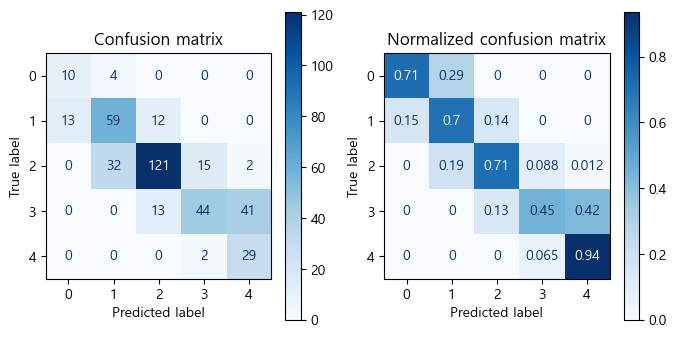

In [61]:
get_evaluation(y_test, dtc_prediction, dtc, X_test)

오차 행렬
[[10  4  0  0  0]
 [13 61 10  0  0]
 [ 0 47 88  9 26]
 [ 0  0 10 41 47]
 [ 0  0  0  6 25]]
정확도: 0.5668, 정밀도: 0.5563, 재현율: 0.6366, F1: 0.5432
################################################################################


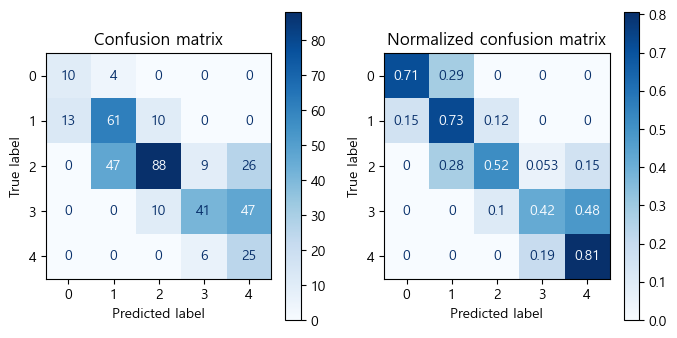

In [62]:
get_evaluation(y_test, svc_l_prediction, svc_l, X_test)

### SVC (kernel : linear) 예측 결과 
#### 정확도 : 58.69% , F1 Score : 57%

오차 행렬
[[ 10   4   0   0   0]
 [ 13  39  32   0   0]
 [  0  26 129  13   2]
 [  0   1  17  70  10]
 [  0   0   0  15  16]]
정확도: 0.6650, 정밀도: 0.6005, 재현율: 0.6336, F1: 0.6090
################################################################################


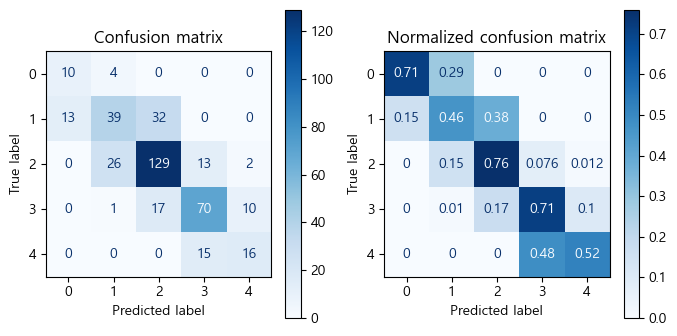

In [63]:
get_evaluation(y_test, knn_prediction, knn, X_test)

오차 행렬
[[ 10   4   0   0   0]
 [ 13  57  14   0   0]
 [  0  30 126  12   2]
 [  0   0  16  41  41]
 [  0   0   0   2  29]]
정확도: 0.6625, 정밀도: 0.6034, 재현율: 0.6976, F1: 0.6128
################################################################################


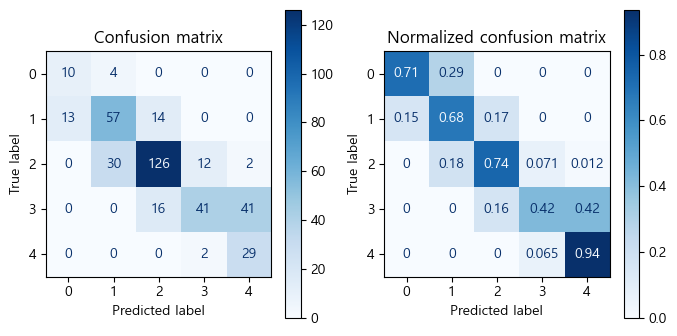

In [64]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

오차 행렬
[[  8   6   0   0   0]
 [ 24  50  10   0   0]
 [  0  36 131   3   0]
 [  0   0  60  38   0]
 [  0   0  14  13   4]]
정확도: 0.5819, 정밀도: 0.6213, 재현율: 0.4908, F1: 0.4650
################################################################################


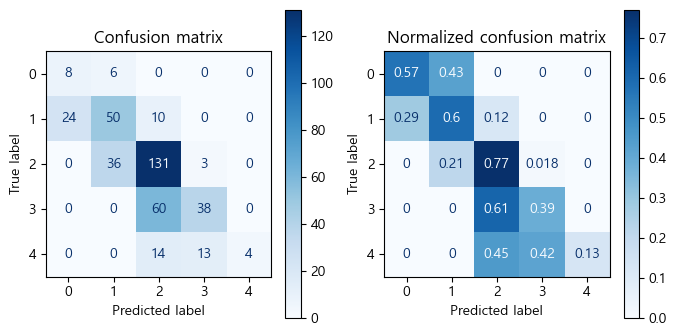

In [65]:
get_evaluation(y_test, ada_prediction, ada, X_test)

오차 행렬
[[ 11   3   0   0   0]
 [ 16  56  12   0   0]
 [  0  32 121  13   4]
 [  0   0  13  47  38]
 [  0   0   0   6  25]]
정확도: 0.6549, 정밀도: 0.5874, 재현율: 0.6900, F1: 0.6052
################################################################################


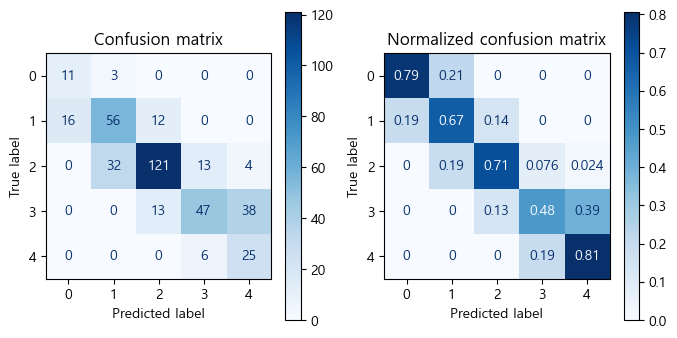

In [66]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

오차 행렬
[[ 11   3   0   0   0]
 [ 16  54  14   0   0]
 [  0  31 122  15   2]
 [  0   0  13  44  41]
 [  0   0   0   2  29]]
정확도: 0.6549, 정밀도: 0.5928, 재현율: 0.7061, F1: 0.6092
################################################################################


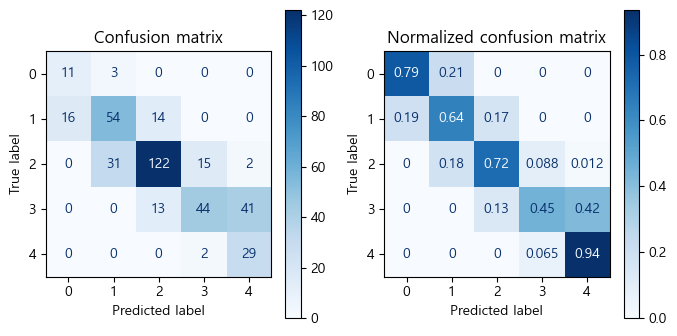

In [67]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

오차 행렬
[[ 11   3   0   0   0]
 [ 16  54  14   0   0]
 [  0  31 122  15   2]
 [  0   0  13  44  41]
 [  0   0   0   2  29]]
정확도: 0.6549, 정밀도: 0.5928, 재현율: 0.7061, F1: 0.6092
################################################################################


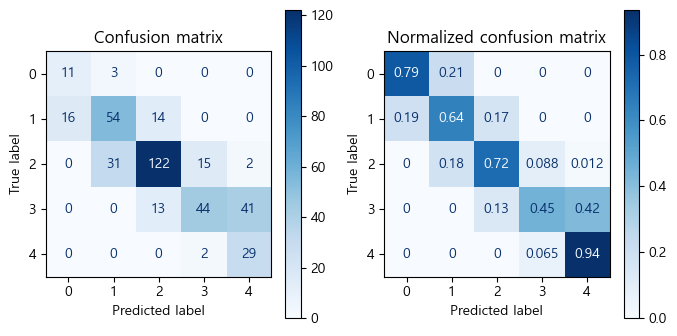

In [68]:
get_evaluation(y_test, lg_prediction, lgbm, X_test)

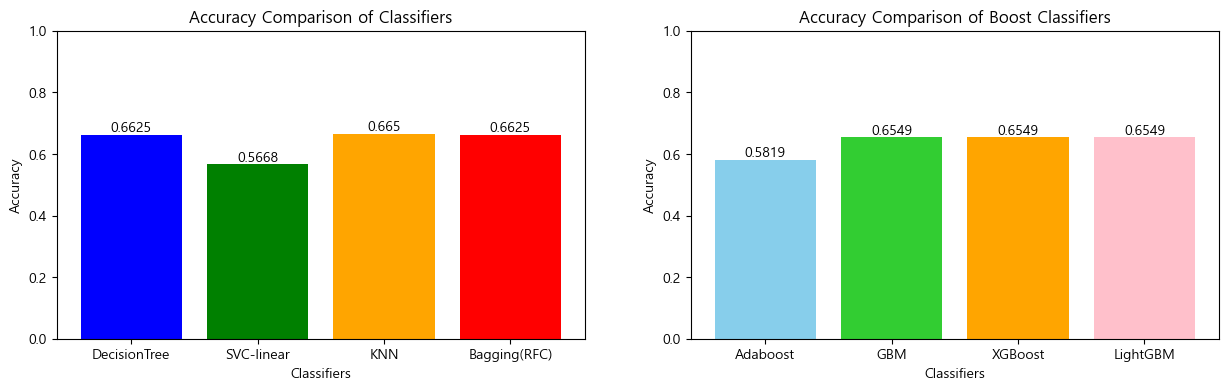

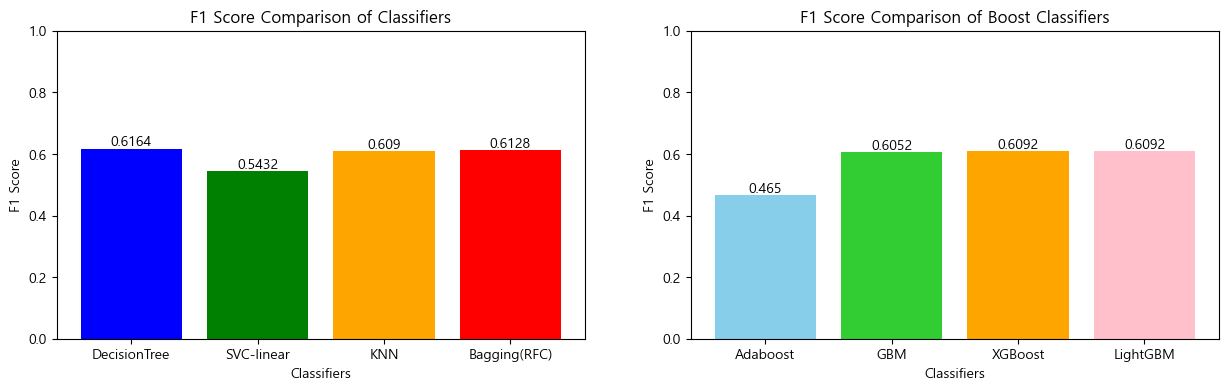

In [70]:
# ----------------- accuracy_score------------------------ #

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# 첫 번째 바 차트 
# 색상 리스트 정의
colors1 = ['blue', 'green', 'orange', 'red','purple']

# 각 분류기법 Accracy Score 리스트 
accuracies1 = [dtc_score, # DTC
              svc_l_score, # SVC-linear
              knn_score, # KNN
              rfc_score, # Random Forest
             ]

classifiers1 = ['DecisionTree','SVC-linear' ,'KNN', 'Bagging(RFC)']
for i, v in enumerate(accuracies1):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers1, accuracies1, color=colors1)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정


# 두 번째 바 차트 
# 색상 리스트 정의
colors2 = ['skyblue', 'limegreen', 'orange', 'pink']

# 각 분류기법 Accracy Score 리스트 
accuracies2 = [ada_score, # adaboost
              gbc_score, # gradient boost
              xgb_score, # XGBoost
              lg_score, # LightGBM
             ]

classifiers2 = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
for i, v in enumerate(accuracies2):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers2, accuracies2, color=colors2)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Accuracy Comparison of Boost Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
plt.show() 


# ---------------f1_score------------------------#

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# 첫 번째 바 차트 
# 색상 리스트 정의
colors1 = ['blue', 'green', 'orange', 'red','purple']

# 각 분류기법 Accracy Score 리스트 
f1 = [dtc_f1, # DTC
              svc_l_f1, # SVC-linear
              knn_f1, # KNN
              rfc_f1, # Random Forest
             ]

classifiers1 = ['DecisionTree','SVC-linear' ,'KNN', 'Bagging(RFC)']
for i, v in enumerate(f1):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers1, f1, color=colors1)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('F1 Score')
    axes[0].set_title('F1 Score Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정


# 두 번째 바 차트 
# 색상 리스트 정의
colors2 = ['skyblue', 'limegreen', 'orange', 'pink']

# 각 분류기법 Accracy Score 리스트 
f2 = [ada_f1, # adaboost
      gbc_f1, # gradient boost
      xgb_f1, # XGBoost
      lg_f1] # LightGBM]

classifiers2 = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
for i, v in enumerate(f2):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers2, f2, color=colors2)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('F1 Score')
    axes[1].set_title('F1 Score Comparison of Boost Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
plt.show() 

### 💡 1 Cycle Result 
> 정확도 , F1 Score 분석 결과 KNN 분류 기법이 전체 분류기법중 가장 높았으며, 해당 데이터 세트에서는 KNN 을 사용하는 것이 적합할 것으로 보입니다.
>
> 다음 두 번째 사이클에서는 SVC 중 rbf 커널을 사용해서 linear 커널을 사용했을 때와 비교해보도록 하겠습니다.

### ✨ 2 Cycle
#### **SVC kernel(linear vs rbf)**
> 우선 기존 SVC에서 kernel을 rbf로 변경하고 추가로 gamma 하이퍼 파라미터 값을 선언합니다.

In [71]:
# SVC 파라미터 선언 (커널을 rbf로  설정)
svc_parameters = {'svc__C': [0.01, 0.1, 1, 10, 100],
                  'svc__gamma' : [0.01, 0.1, 1, 10, 100],
                  'svc__kernel': ['rbf']
                 }

# SVC 클래스 설정 (커널을 rbf로 설정)
svc = SVC(kernel='rbf', probability=True)

# SVC 파이프라인 구축, 교차 검증 수행
svc_pipe_r = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc_r = GridSearchCV(svc_pipe_r, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_svc_r.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['rbf']},
             return_train_score=True)

In [72]:
svc_r_result_df = pd.DataFrame(g_svc_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(svc_r_result_df)

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...",0.290722,25
1,"{'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...",0.573490,20
2,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.566127,22
3,"{'svc__C': 0.01, 'svc__gamma': 10, 'svc__kerne...",0.542268,24
4,"{'svc__C': 0.01, 'svc__gamma': 100, 'svc__kern...",0.543741,23
5,"{'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...",0.567894,21
6,"{'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...",0.690722,18
7,"{'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'...",0.708100,17
8,"{'svc__C': 0.1, 'svc__gamma': 10, 'svc__kernel...",0.717231,15
9,"{'svc__C': 0.1, 'svc__gamma': 100, 'svc__kerne...",0.717231,15


In [73]:
g_svc_r.best_estimator_

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=1, gamma=10, probability=True))])

In [74]:
svc_r = g_svc_r.best_estimator_
svc_r_prediction = svc_r.predict(X_test)
svc_r_score = accuracy_score(y_test, svc_r_prediction)
svc_r_recall = recall_score(y_test, svc_r_prediction, average='macro')
svc_r_f1 = f1_score(y_test, svc_r_prediction, average='macro')

print(f'정확도 : {svc_r_score}')
print(f'재현율 : {svc_r_recall}')
print(f'F1 Score : {svc_r_f1}')

정확도 : 0.6574307304785895
재현율 : 0.706448514889827
F1 Score : 0.6098456290758507


오차 행렬
[[ 11   3   0   0   0]
 [ 16  54  14   0   0]
 [  0  30 124  14   2]
 [  0   0  14  43  41]
 [  0   0   0   2  29]]
정확도: 0.6574, 정밀도: 0.5951, 재현율: 0.7064, F1: 0.6098
################################################################################


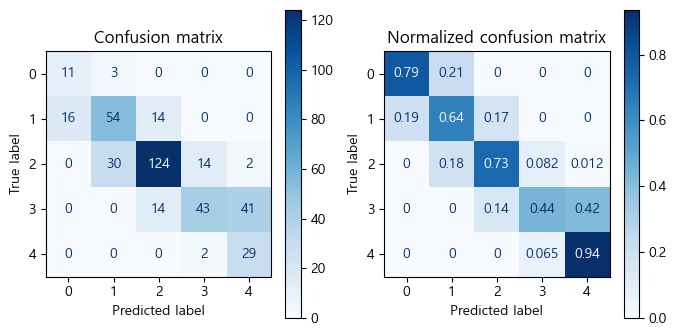

In [75]:
get_evaluation(y_test, svc_r_prediction, svc_r, X_test)

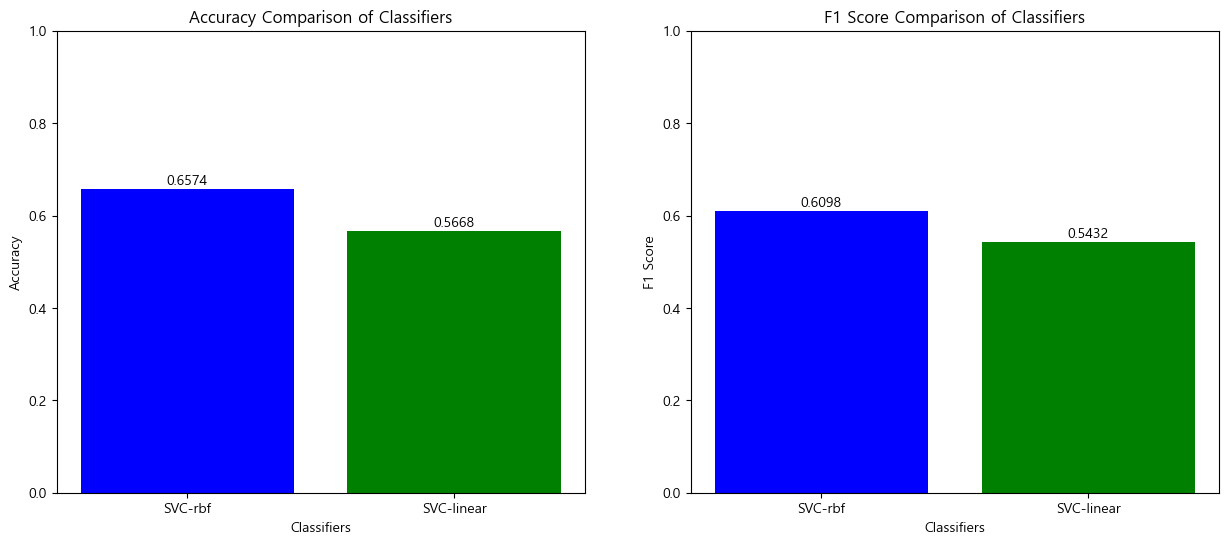

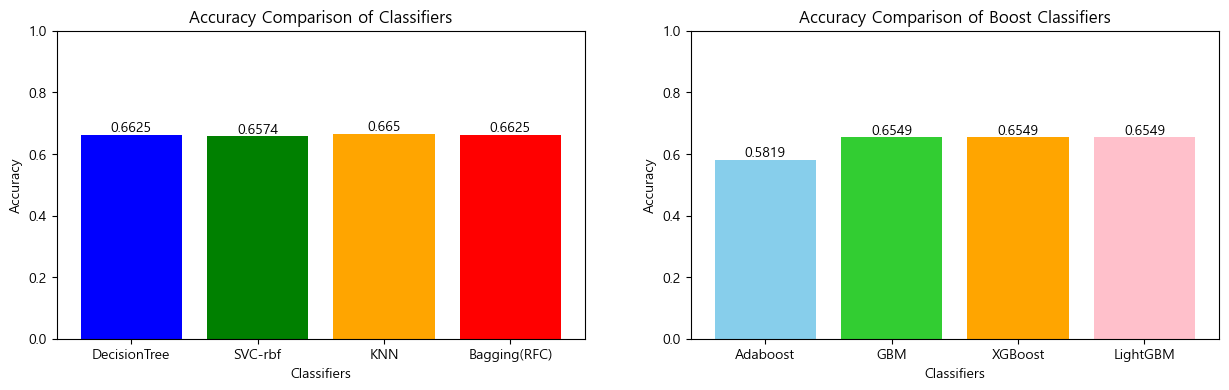

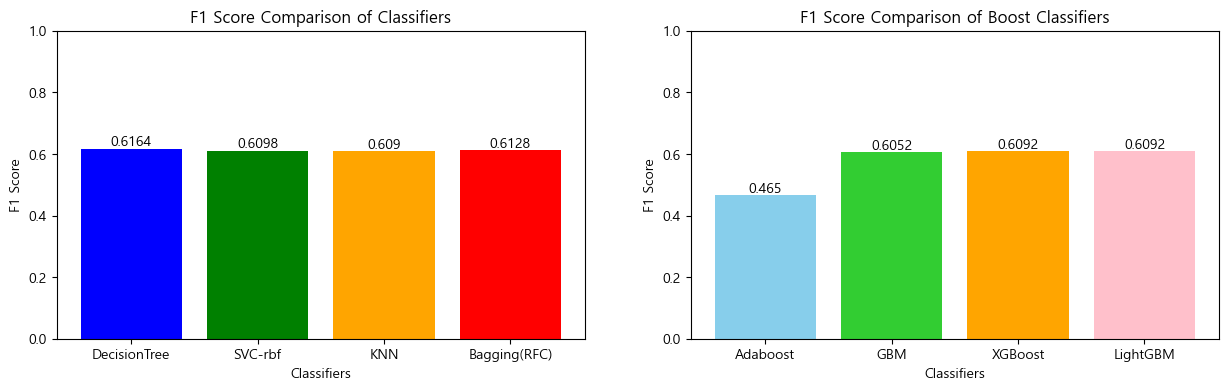

In [79]:
fig , axes = plt.subplots(1,2, figsize=(15,6))
colors = ['blue', 'green', 'orange', 'red','purple']

# 각 분류기법 Accracy Score 리스트 
accuracies = [svc_r_score, # SVC-rbf
              svc_l_score, # SVC-linear
             ]

precision = [svc_r_recall, # SVC-rbf
              svc_l_recall, # SVC-linear
             ]

f1_score = [svc_r_f1, # SVC-rbf
              svc_l_f1, # SVC-linear
             ]

classifiers = ['SVC-rbf','SVC-linear' ]
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers, accuracies, color=colors)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정

for i, v in enumerate(f1_score):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers, f1_score, color=colors)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('F1 Score')
    axes[1].set_title('F1 Score Comparison of Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정

plt.show() 


# ----------------- accuracy_score------------------------ #

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# 첫 번째 바 차트 
# 색상 리스트 정의
colors1 = ['blue', 'green', 'orange', 'red','purple']

# 각 분류기법 Accracy Score 리스트 
accuracies1 = [dtc_score, # DTC
              svc_r_score, # SVC-linear
              knn_score, # KNN
              rfc_score, # Random Forest
             ]

classifiers1 = ['DecisionTree','SVC-rbf' ,'KNN', 'Bagging(RFC)']
for i, v in enumerate(accuracies1):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers1, accuracies1, color=colors1)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정


# 두 번째 바 차트 
# 색상 리스트 정의
colors2 = ['skyblue', 'limegreen', 'orange', 'pink']

# 각 분류기법 Accracy Score 리스트 
accuracies2 = [ada_score, # adaboost
              gbc_score, # gradient boost
              xgb_score, # XGBoost
              lg_score, # LightGBM
             ]

classifiers2 = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
for i, v in enumerate(accuracies2):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers2, accuracies2, color=colors2)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Accuracy Comparison of Boost Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
plt.show() 


# ---------------f1_score------------------------#

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# 첫 번째 바 차트 
# 색상 리스트 정의
colors1 = ['blue', 'green', 'orange', 'red','purple']

# 각 분류기법 Accracy Score 리스트 
f1 = [dtc_f1, # DTC
              svc_r_f1, # SVC-linear
              knn_f1, # KNN
              rfc_f1, # Random Forest
             ]

classifiers1 = ['DecisionTree','SVC-rbf' ,'KNN', 'Bagging(RFC)']
for i, v in enumerate(f1):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers1, f1, color=colors1)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('F1 Score')
    axes[0].set_title('F1 Score Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정


# 두 번째 바 차트 
# 색상 리스트 정의
colors2 = ['skyblue', 'limegreen', 'orange', 'pink']

# 각 분류기법 Accracy Score 리스트 
f2 = [ada_f1, # adaboost
      gbc_f1, # gradient boost
      xgb_f1, # XGBoost
      lg_f1] # LightGBM]

classifiers2 = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
for i, v in enumerate(f2):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers2, f2, color=colors2)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('F1 Score')
    axes[1].set_title('F1 Score Comparison of Boost Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
plt.show() 

### 💡 2 Cycle Result
> SVC에서 커널을 기존 linear 방식에서 rbf 방식으로 변경한 결과 정확도 측면에서 rbf 커널이 64% 로 58% 인 linear 방식보다 더 좋은 것을 확인 할 수 있으며, 정밀도 및 재현율 같은 경우에도 더 높은 것을 확인 할 수 있었습니다.
>
> 결론으로는 해당 데이터세트에서는 SVC 사용 시, rbf 커널을 사용하는 것을 권장드립니다.

### ✨ 3 Cycle
#### Voting (hard vs soft)
> 기존 RandomForest 알고리즘을 활용한 bagging 분류 기법에서 Voting 분류 기법으로 적용 해보고, hard, soft voting 을 사용해서 각각의 정확도 및 F1 Score점수를 산출 해보도록 하겠습니다.

In [80]:
# Hard Votikng
from sklearn.ensemble import VotingClassifier
vc_hard = VotingClassifier(estimators=[('dtc', dtc),('svc',svc_pipe_r),('knn',knn_pipe), ('ada',g_ada),
                                      ('xgb',xgb)], voting='hard', n_jobs=-1)


In [81]:
vc_hard.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=7,
                                                     min_samples_split=12)),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc', SVC(probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier())])),
                             ('ada',
                              GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
                                           n_jobs=-1,
                                           par...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.7, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 n_jobs=-1)

In [82]:
vc_h_prediction = vc_hard.predict(X_test)

In [83]:
vc_hard_score = accuracy_score(y_test, vc_h_prediction)
vc_hard_precision = precision_score(y_test, vc_h_prediction, average='macro')
vc_hard_f1 = precision_score(y_test, vc_h_prediction, average='macro')

print(f'정확도 : {vc_hard_score}')
print(f'정밀도 : {vc_hard_precision}')
print(f'F1 Score : {vc_hard_f1}')
# hard voting : 67%

정확도 : 0.672544080604534
정밀도 : 0.6033331718595152
F1 Score : 0.6033331718595152


In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='macro')
#     재현율
    recall = recall_score(y_test , prediction, average='macro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='macro')

    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[ 10   4   0   0   0]
 [ 13  59  12   0   0]
 [  0  32 122  14   2]
 [  0   0  15  51  32]
 [  0   0   0   6  25]]
정확도: 0.6725, 정밀도: 0.6033, 재현율: 0.6922, F1: 0.6248
################################################################################


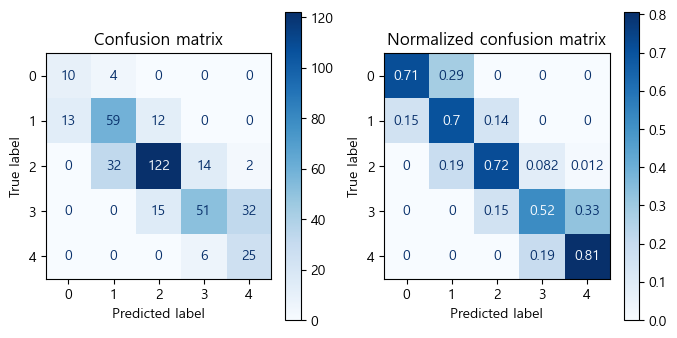

In [85]:
get_evaluation(y_test, vc_h_prediction, vc_hard, X_test)

#### **Hard Voting : 정확도 (67%) , F1 Score(62%)**

In [86]:
# Soft Votikng
from sklearn.ensemble import VotingClassifier
vc_soft = VotingClassifier(estimators=[('dtc', dtc),('svc',svc_pipe_r),('knn',knn_pipe), ('ada',g_ada),
                                      ('xgb',xgb)], voting='soft', n_jobs=-1)

In [87]:
vc_soft.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=7,
                                                     min_samples_split=12)),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc', SVC(probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier())])),
                             ('ada',
                              GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
                                           n_jobs=-1,
                                           par...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.7, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 n_jobs=-1, voting='soft')

In [88]:
vc_s_prediction = vc_soft.predict(X_test)

In [89]:
vc_soft_score = accuracy_score(y_test, vc_s_prediction)
vc_soft_precision = precision_score(y_test, vc_s_prediction, average='macro')
vc_soft_f1 = f1_score(y_test, vc_s_prediction, average='macro')

print(f'정확도 : {vc_soft_score}')
print(f'정밀도 : {vc_soft_precision}')
print(f'F1 Score : {vc_soft_f1}')
# voting (soft) = 68%

정확도 : 0.6801007556675063
정밀도 : 0.6005076272085258
F1 Score : 0.6257286092573249


오차 행렬
[[ 11   3   0   0   0]
 [ 16  56  12   0   0]
 [  0  32 124  12   2]
 [  0   0  16  59  23]
 [  0   0   0  11  20]]
정확도: 0.6801, 정밀도: 0.6005, 재현율: 0.6858, F1: 0.6257
################################################################################


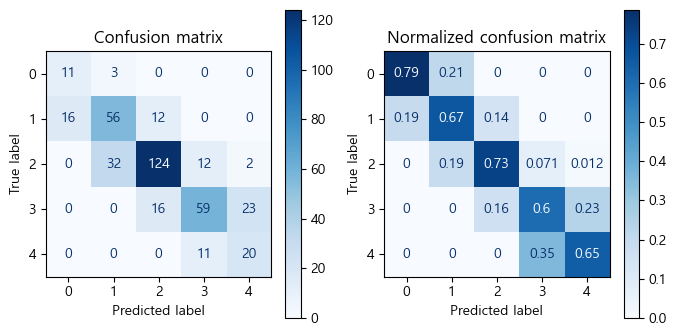

In [90]:
get_evaluation(y_test, vc_s_prediction, vc_soft, X_test)

#### **Soft Voting : 정확도 (68%) , F1 Score(62%)**

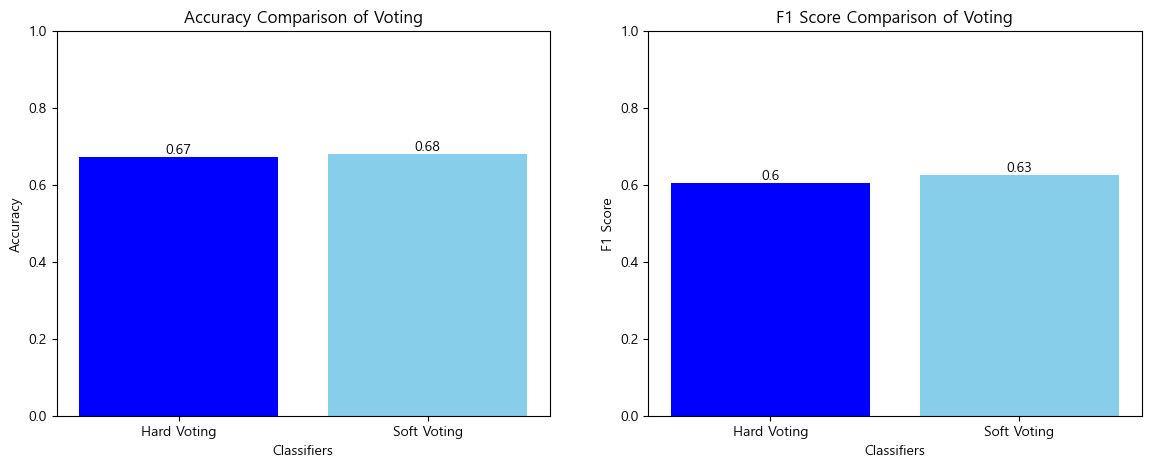

In [91]:
fig , axes = plt.subplots(1,2, figsize=(14,5))
colors = ['blue','skyblue']

# 각 분류기법 Accracy Score 리스트 
accuracies = [vc_hard_score, # Hard Voting
              vc_soft_score, # Soft Voting
             ]

precision = [vc_hard_precision, vc_soft_precision]

f1_score = [vc_hard_f1, vc_soft_f1]

classifiers = ['Hard Voting','Soft Voting' ]
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, str(round(v, 2)), color='black', ha='center')
    axes[0].bar(classifiers, accuracies, color=colors)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Voting')
    axes[0].set_ylim(0, 1)  # y축 범위 설정


for i, v in enumerate(f1_score):
    axes[1].text(i, v + 0.01, str(round(v, 2)), color='black', ha='center')
    axes[1].bar(classifiers, f1_score, color=colors)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('F1 Score')
    axes[1].set_title('F1 Score Comparison of Voting')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
plt.show() 

### 💡 3 Cycle Result
> #### Soft Voting 오차행렬 & 각 통계 점수 (정확도 68%) , (F1 Score 63%)
> 
>
> 
> #### Soft Voting 오차행렬 & 각 통계 점수 (정확도 67%), (F1 Score 60%)

>
> #### 📌해당 데이터세트에서는 Voting 분류 시 Soft Voting이 적합합니다.

### ✨ 4 Cycle
#### **Voting(hard) vs Bagging(RandomForest)**
> 해당 데이터 세트에서 적합한 Ensemble 분류 모델 중에서 Voting 방식과 Bagging 방식을 서로 비교해보고 더 적합한 분류 기법을 찾겠습니다.

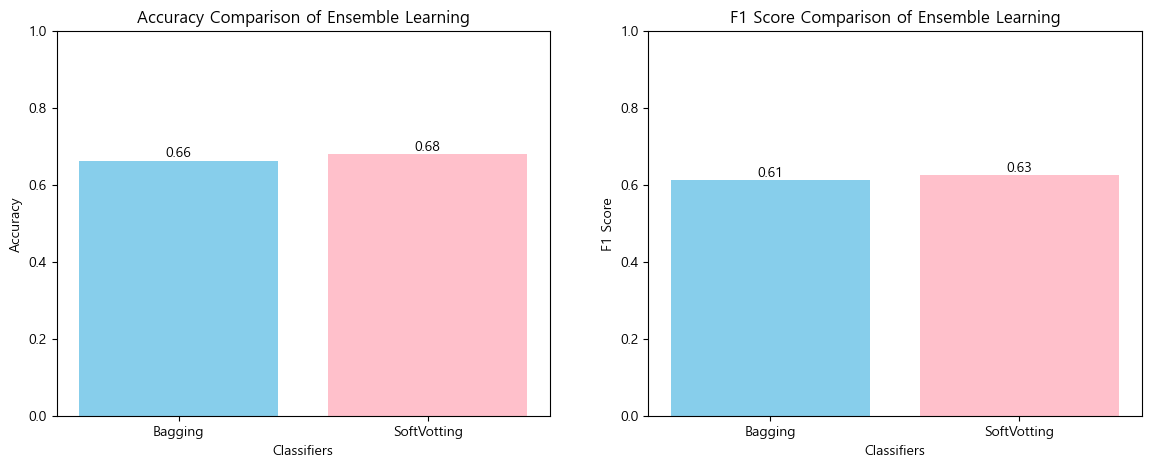

In [93]:
## Bagginhg 방식이 Votting 방식보다 더 정확도가 높은 것을 확인 
# 색상 리스트 정의
fig , axes = plt.subplots(1,2, figsize=(14,5))

colors = ['skyblue', 'pink']

accuracies = [rfc_score,
              vc_soft_score,]

f1_scores = [rfc_f1, vc_soft_f1]

classifiers = ['Bagging', 'SoftVotting']

for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, str(round(v, 2)), color='black', ha='center')
    axes[0].bar(classifiers, accuracies, color=colors)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Ensemble Learning')
    axes[0].set_ylim(0, 1)  # y축 범위 설정
    
for i, v in enumerate(f1_scores):
    axes[1].text(i, v + 0.01, str(round(v, 2)), color='black', ha='center')
    axes[1].bar(classifiers, f1_scores, color=colors)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('F1 Score')
    axes[1].set_title('F1 Score Comparison of Ensemble Learning')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
    
plt.show() 

### 💡 4 Cycle Result
> #### Soft Voting이 bagging 방식보다 정확도와 F1 Score 모두 높은 것을 볼 수 있으며, 해당 데이터세트 에서는 
>
> #### bagging 방식보다 Soft votting 분류기법이 더 적합하다고 판단 됩니다.

### 📊 Total Result

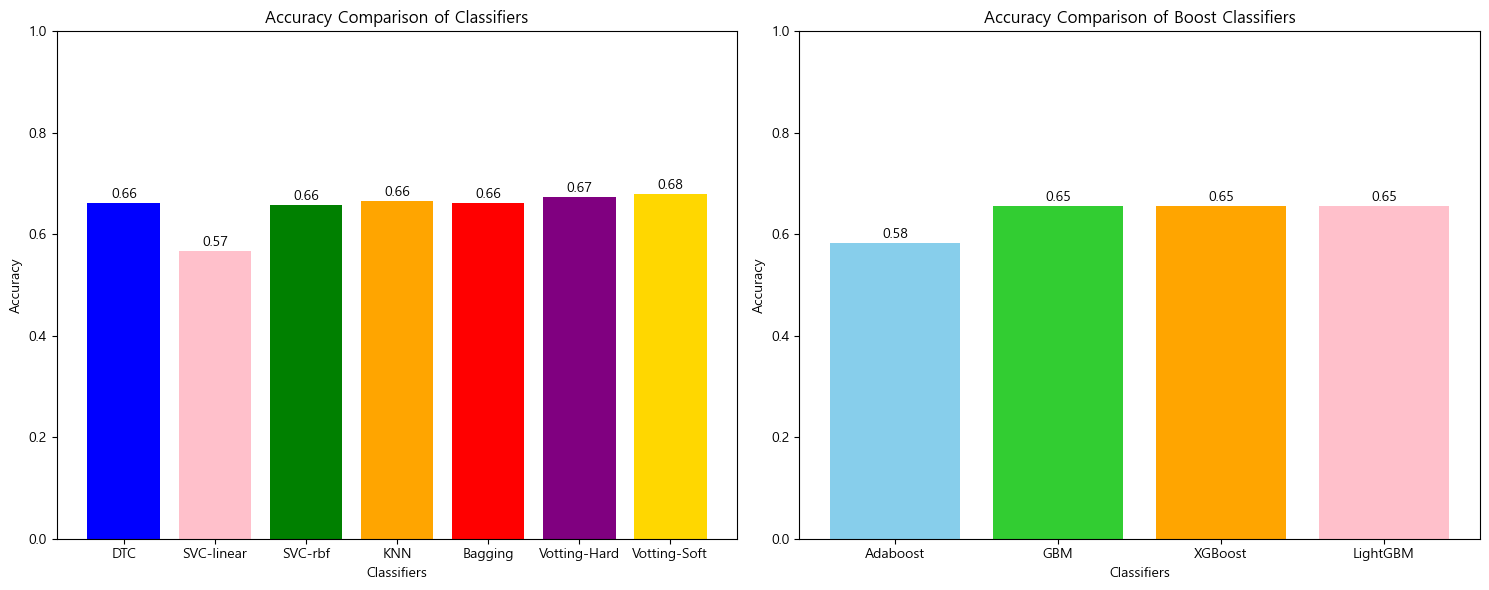

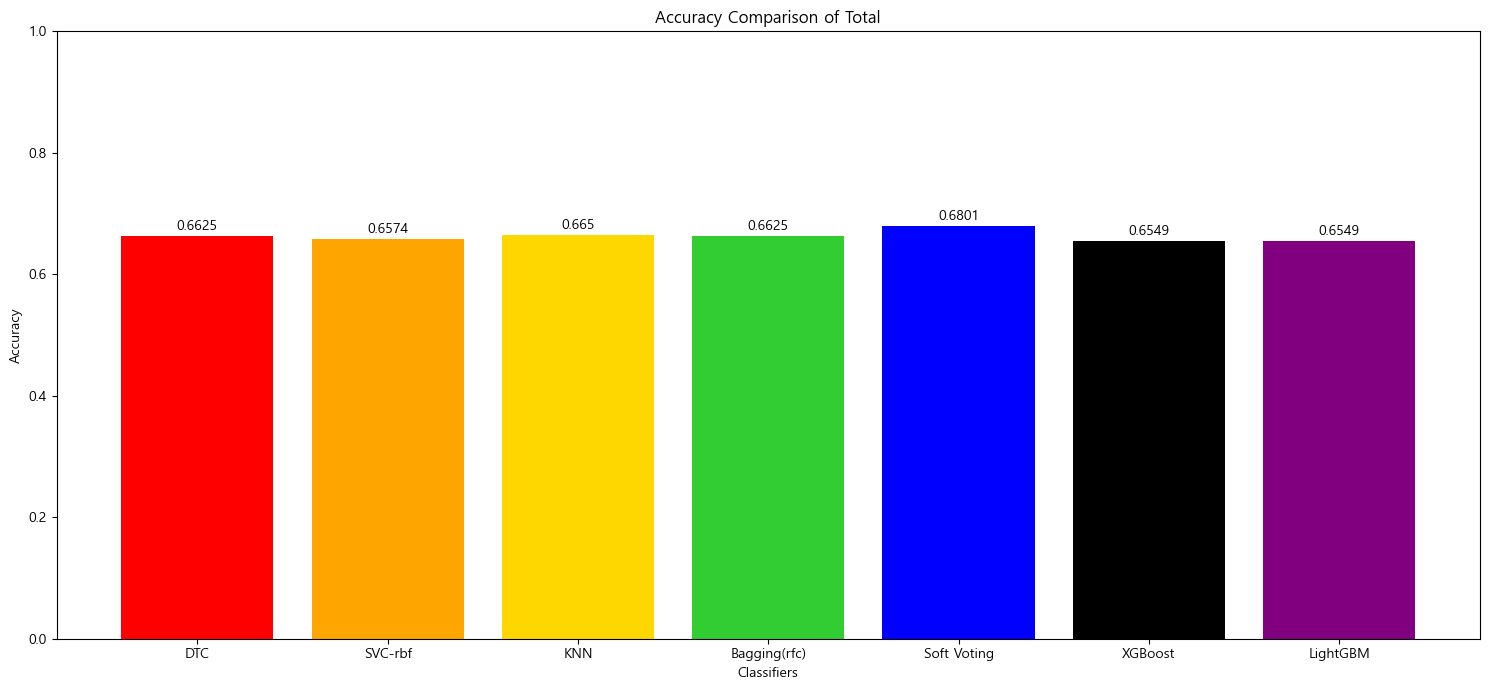

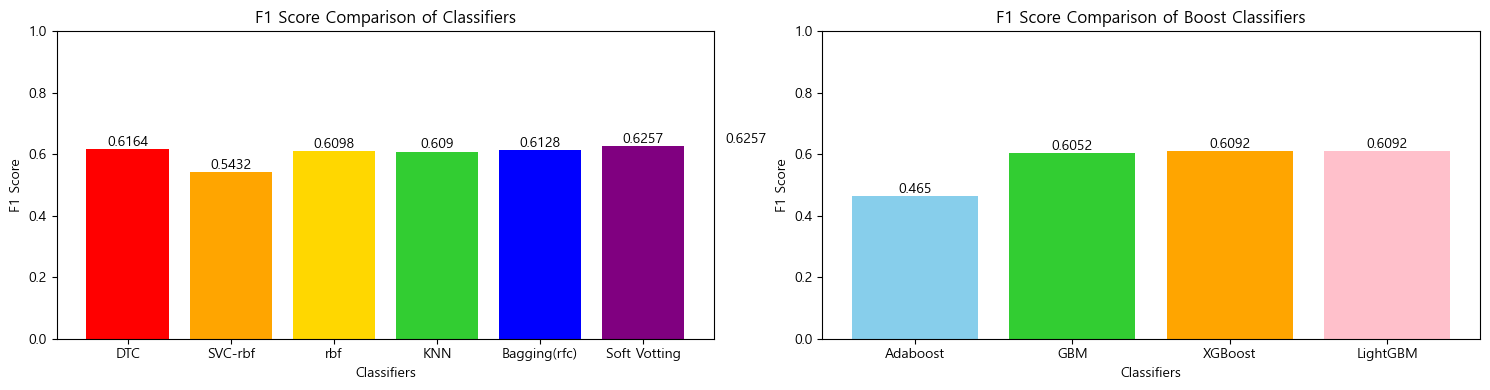

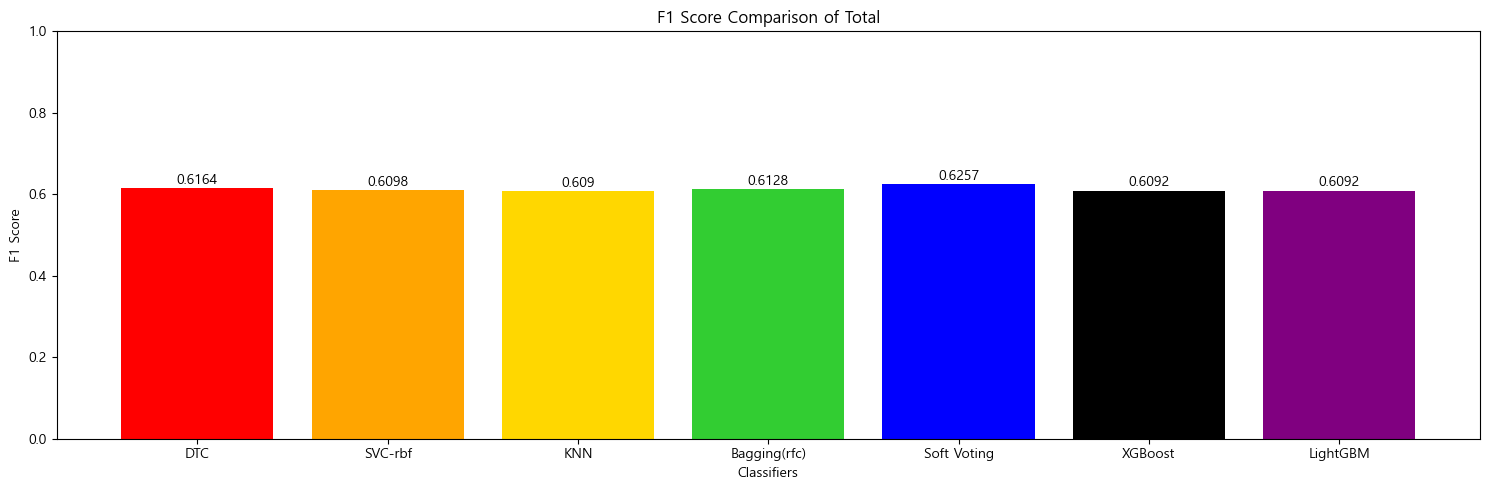

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# 첫 번째 바 차트
colors1 = ['blue', 'pink','green', 'orange', 'red', 'purple', 'gold']
accuracies1 = [dtc_score, svc_l_score, svc_r_score, knn_score, rfc_score, vc_hard_score, vc_soft_score]
classifiers1 = ['DTC', 'SVC-linear' ,'SVC-rbf', 'KNN', 'Bagging', 'Votting-Hard' , 'Votting-Soft']

for i, v in enumerate(accuracies1):
    axes[0].text(i, v + 0.01, str(round(v, 2)), color='black', ha='center')
    axes[0].bar(classifiers1, accuracies1, color=colors1)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정




# 두 번째 바 차트

colors2 = ['skyblue', 'limegreen', 'orange', 'pink']
accuracies2 = [ada_score, gbc_score, xgb_score, lg_score]
classifiers2 = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
for i, v in enumerate(accuracies2):
    axes[1].text(i, v + 0.01, str(round(v, 2)), color='black', ha='center')
    axes[1].bar(classifiers2, accuracies2, color=colors2)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Accuracy Comparison of Boost Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정

plt.tight_layout()
plt.show()

plt.subplots(figsize=(15,7))

colors3 = ['red','orange','gold','limegreen','blue','black','purple', 'pink']
accuracies3 = [dtc_score, svc_r_score, knn_score, rfc_score, vc_soft_score, xgb_score, lg_score]
classifiers3 = ['DTC', 'SVC-rbf' ,'KNN', 'Bagging(rfc)', 'Soft Voting', 'XGBoost', 'LightGBM']

for i, v in enumerate(accuracies3):
    plt.text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(classifiers3, accuracies3, color=colors3)
    plt.xlabel('Classifiers')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison of Total')
    plt.ylim(0, 1)  # y축 범위 설정
plt.tight_layout()
plt.show()


###------------------- F1 Score ------------------------###

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# 첫 번째 바 차트 (F1 Score)
colors1 = ['red','orange','gold','limegreen','blue','black','purple', 'pink']
accuracies1 = [dtc_f1, svc_l_f1, svc_r_f1, knn_f1, rfc_f1, vc_soft_f1, vc_soft_f1]
classifiers1 = ['DTC', 'SVC-rbf' ,'rbf', 'KNN', 'Bagging(rfc)', 'Soft Votting' , 'Soft Votting']

for i, v in enumerate(accuracies1):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers1, accuracies1, color=colors1)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('F1 Score')
    axes[0].set_title('F1 Score Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정



# 두 번째 바 차트 (F1 Score)
colors2 = ['skyblue', 'limegreen', 'orange', 'pink']
accuracies2 = [ada_f1, gbc_f1, xgb_f1, lg_f1]
classifiers2 = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
for i, v in enumerate(accuracies2):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers2, accuracies2, color=colors2)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('F1 Score')
    axes[1].set_title('F1 Score Comparison of Boost Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
    
plt.tight_layout()
plt.show()




# 세 번째 바 차트
fig, axes = plt.subplots(figsize=(15,5))

colors3 = ['red','orange','gold','limegreen','blue','black','purple', 'pink']
f13 = [dtc_f1, svc_r_f1, knn_f1, rfc_f1, vc_soft_f1, xgb_f1, lg_f1]

classifiers3 = ['DTC', 'SVC-rbf' ,'KNN', 'Bagging(rfc)', 'Soft Voting', 'XGBoost', 'LightGBM']

for i, v in enumerate(f13):
    plt.text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(classifiers3, f13, color=colors3)
    plt.xlabel('Classifiers')
    plt.ylabel('F1 Score')
    plt.title('F1 Score Comparison of Total')
    plt.ylim(0, 1)  # y축 범위 설정
plt.tight_layout()
plt.show()

### 📃 결론 
> 위 시각화 분석 결과
> 전체 분류기법 중 가장 정확도가 높은 분류기는 soft voting 이였으며 정확도 점수로 0.68이 나왔습니다.
> 
> F1 Score의 경우 가장 점수가 높은 분류기법은 soft voting 분류 기법이였으며, 0.62의 점수를 기록 하였습니다.
> 
> 위 내용을 토대로 해당 데이터세트에 가장 적합한 분류기법은 Soft voting 으로 판단하였습니다.